# Fashion MNIST classifier in Pytorch

This notebook is adapted from https://pytorch.org/tutorials/beginner/introyt/trainingyt.html



In [ ]:
# Download training and testing data from open datasets.
training_data = datasets.FashionMNIST(train=True)
test_data = datasets.FashionMNIST(train=False)

In [14]:
# Create data loaders.
batch_size = 64
# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [15]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Sample and visualize the data
def visualize_samples(data, num_samples=9):
    # Set up the grid for the images
    plt.figure(figsize=(8, 8))
    for i in range(num_samples):
        # Randomly select an image and label from the dataset
        img, label = data[torch.randint(len(data), size=(1,)).item()]
        
        # Display the image
        plt.subplot(3, 3, i + 1)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(class_names[label])
        plt.axis("off")

    plt.show()

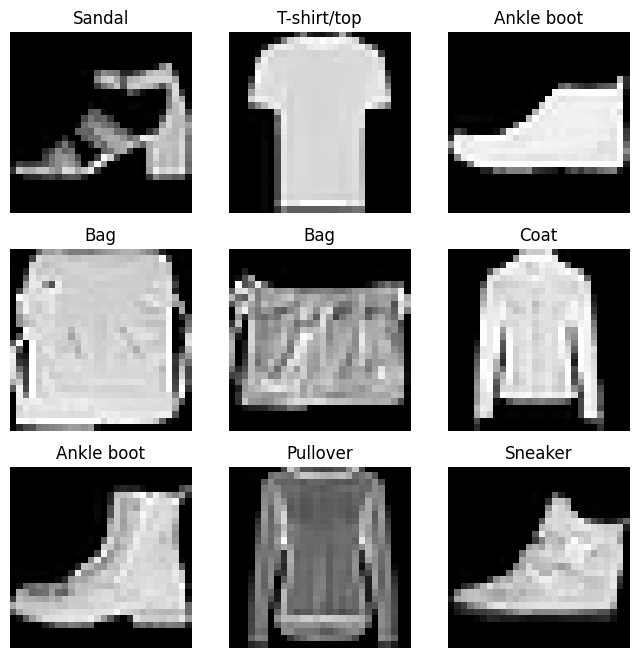

In [16]:
# Visualize the data
visualize_samples(training_data, num_samples=9)

In [17]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [18]:
# training procedure
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    for (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [19]:
# testing procedure
def test(dataloader, model, loss_fn):
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches


In [20]:
# Create the model
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [21]:
# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [22]:
# Train the model
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.319156  [   64/60000]
loss: 2.298958  [ 6464/60000]
loss: 2.287583  [12864/60000]
loss: 2.269181  [19264/60000]
loss: 2.250529  [25664/60000]
loss: 2.232520  [32064/60000]
loss: 2.228938  [38464/60000]
loss: 2.203721  [44864/60000]
loss: 2.201261  [51264/60000]
loss: 2.161193  [57664/60000]
Test Error: 
 Accuracy: 47.4%, Avg loss: 2.165043 

Epoch 2
-------------------------------
loss: 2.179142  [   64/60000]
loss: 2.165643  [ 6464/60000]
loss: 2.123014  [12864/60000]
loss: 2.129044  [19264/60000]
loss: 2.082909  [25664/60000]
loss: 2.029410  [32064/60000]
loss: 2.041161  [38464/60000]
loss: 1.976677  [44864/60000]
loss: 1.975330  [51264/60000]
loss: 1.899925  [57664/60000]
Test Error: 
 Accuracy: 57.1%, Avg loss: 1.909955 

Epoch 3
-------------------------------
loss: 1.939458  [   64/60000]
loss: 1.907061  [ 6464/60000]
loss: 1.810263  [12864/60000]
loss: 1.840363  [19264/60000]
loss: 1.744621  [25664/60000]
loss: 1.691382  [32064/600

In [23]:
# Sample and visualize the data
def visualize_one(data):
    # Set up the grid for the images
    plt.figure(figsize=(8,8))
    # Display the image
    plt.subplot(3, 3, 1)
    plt.imshow(data.squeeze(), cmap="gray")
    plt.axis("off")

    plt.show()

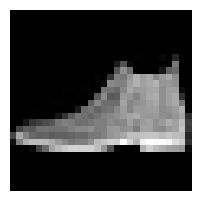

Predicted: "Ankle boot", Actual: "Ankle boot"


In [24]:
# evaluate the model

model.eval()
x, y = test_data[0][0], test_data[0][1]
visualize_one(x)

with torch.no_grad():
    pred = model(x)
    predicted, actual = class_names[pred[0].argmax(0)], class_names[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')